In [23]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The file path for the EEG data
file_path = "EEG_data/Physionet/S001/S001R14.edf"

# Load the raw EEG data and get events
raw = mne.io.read_raw_edf(file_path, preload=True)
events, event_id = mne.events_from_annotations(raw)
tmin, tmax = -0.5, 4.0

# Create epochs from the raw data based on events
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=(None, 0), preload=True)
data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
labels = epochs.events[:, -1]  # Event IDs corresponding to each epoch  
times = epochs.times  # Time vector for the epochs
event_ids = epochs.events[:, -1]
print(event_ids)
data = data.reshape(data.shape[0], -1)  # Reshape data to (n_epochs, n_channels * n_times)
df = pd.DataFrame(data)
df["label"] = labels
print(df)


Extracting EDF parameters from d:\Data\Sanjeev\IITM\Year5\DDP_EEG_Research\EEG_data\Physionet\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Not setting metadata
30 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 721 original time points ...
1 bad epochs dropped
[3 1 2 1 3 1 2 1 2 1 3 1 2 1 3 1 2 1 3 1 3 1 2 1 3 1 2 1 3]
               0             1             2         3         4         5  \
0   2.220988e-05  1.320988e-05  1.820988e-05  0.000015  0.000011  0.000014   
1  -5.381481e-05 -1.381481e-05 -2.981481e-05 -0.000041 -0.000043 -0.000031   
2  -2.028395e-05  2.716049e-06 -4.128395e-05 -0.000061 -0.000044 -0.000056   
3  -5.514815e-05 -5.214815e-05 -6.814815

In [13]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The file path for the EEG data
file_path = "EEG_data/Physionet/S001/S001R14.edf"

# Load the raw EEG data and get events
raw = mne.io.read_raw_edf(file_path, preload=True)
events, event_id = mne.events_from_annotations(raw)
tmin, tmax = -0.5, 4.0

# Create epochs from the raw data based on events
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=(None, 0), preload=True)
data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
labels = epochs.events[:, -1]  # Event IDs corresponding to each epoch   
times = epochs.times  # Time vector for the epochs
event_ids = epochs.events[:, -1]
print(event_ids)
data = data.reshape(data.shape[0], -1)  # Reshape data to (n_epochs, n_channels * n_times)
df = pd.DataFrame(data)
df["label"] = labels
print(df)


Extracting EDF parameters from d:\Data\Sanjeev\IITM\Year5\DDP_EEG_Research\EEG_data\Physionet\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Not setting metadata
30 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 721 original time points ...
1 bad epochs dropped
[3 1 2 1 3 1 2 1 2 1 3 1 2 1 3 1 2 1 3 1 3 1 2 1 3 1 2 1 3]
               0             1             2         3         4         5  \
0   2.220988e-05  1.320988e-05  1.820988e-05  0.000015  0.000011  0.000014   
1  -5.381481e-05 -1.381481e-05 -2.981481e-05 -0.000041 -0.000043 -0.000031   
2  -2.028395e-05  2.716049e-06 -4.128395e-05 -0.000061 -0.000044 -0.000056   
3  -5.514815e-05 -5.214815e-05 -6.814815

Extracting EDF parameters from d:\Data\Sanjeev\IITM\Year5\DDP_EEG_Research\EEG_data\Physionet\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Not setting metadata
30 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline cor

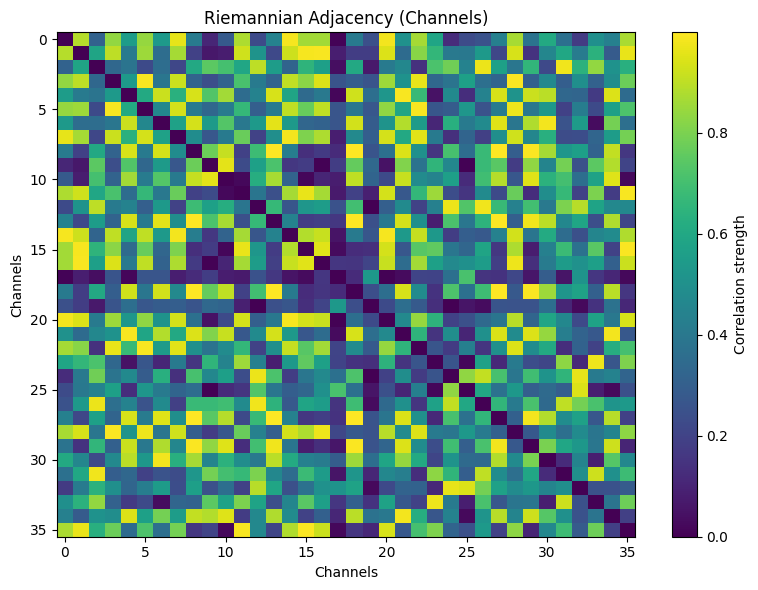

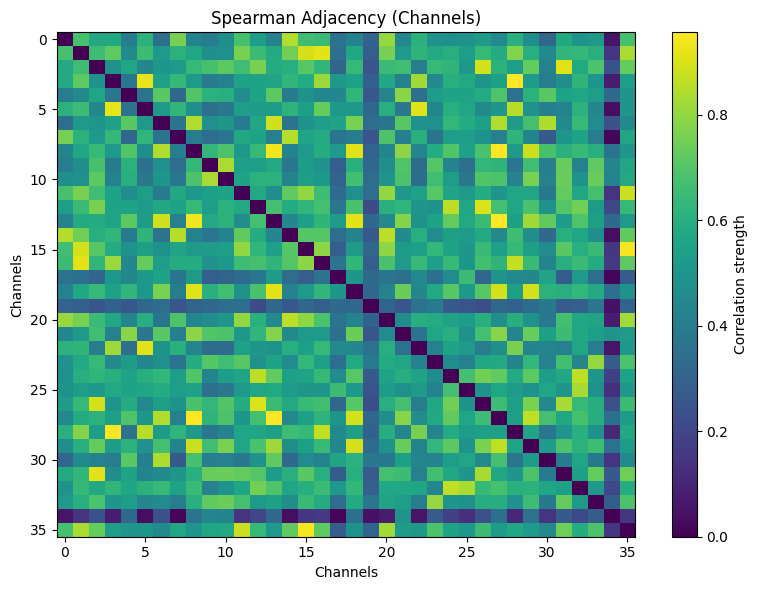

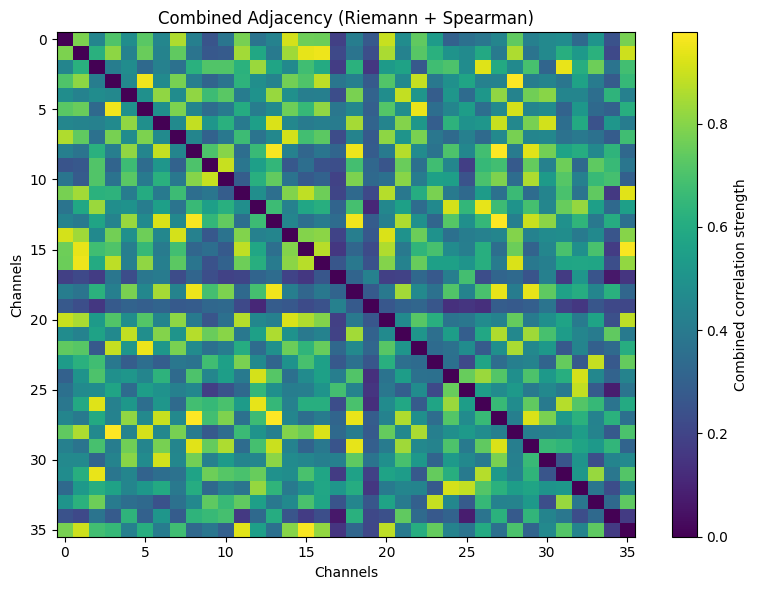

In [40]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.utils.mean import mean_logeuclid

# -----------------------------
# Load EEG data
# -----------------------------
file_path = "EEG_data/Physionet/S001/S001R14.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Rename channels (remove dots etc.)
mapping = {ch_name: ch_name.replace('.', '') for ch_name in raw.info['ch_names']}
raw.rename_channels(mapping)

# Standard montage
montage = mne.channels.make_standard_montage('standard_1020')
valid_channels = list(set(raw.ch_names) & set(montage.ch_names))
raw.pick(valid_channels)

# Bandpass filter
raw.filter(8, 30, fir_design='firwin')

# Events → epochs
events, event_id = mne.events_from_annotations(raw)
tmin, tmax = -0.5, 4.0
epochs = mne.Epochs(raw, events, event_id, tmin, tmax,
                    baseline=(None, 0), preload=True)
epochs_data = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
n_channels = epochs_data.shape[1]

# -----------------------------
# 1. Riemannian adjacency (channel correlations)
# -----------------------------
# Covariance matrices for each epoch
cov_estimator = Covariances(estimator='oas')
covs = cov_estimator.fit_transform(epochs_data)  # (n_epochs, n_channels, n_channels)

# Mean covariance across epochs
mean_cov = mean_logeuclid(covs)  # (n_channels, n_channels)

# Convert to tangent space (optional)
ts = TangentSpace(metric='logeuclid')
ts_features = ts.fit_transform(covs)  # (n_epochs, n_features)

# Compute channel-wise correlation from mean covariance
adj_matrix_riemann = np.corrcoef(mean_cov)
adj_matrix_riemann = np.abs(adj_matrix_riemann)
np.fill_diagonal(adj_matrix_riemann, 0)

# -----------------------------
# 2. Spearman adjacency (channel correlations using FFT)
# -----------------------------
# Take all epochs, average across epochs for stability
fft_all = np.fft.fft(epochs_data, axis=2)  # (n_epochs, n_channels, n_times)
fft_mean = fft_all.mean(axis=0).real        # (n_channels, n_times)

# Only positive frequencies
fft_freq = np.fft.fftfreq(epochs_data.shape[2], 1.0 / raw.info['sfreq'])
positive_idx = np.where(fft_freq > 0)[0]
fft_pos = fft_mean[:, positive_idx]

# Spearman correlation across channels
corr_matrix_spearman, _ = spearmanr(fft_pos.T)
adj_matrix_spearman = np.abs(corr_matrix_spearman)
np.fill_diagonal(adj_matrix_spearman, 0)

# -----------------------------
# Shapes check
# -----------------------------
print(f"Riemannian adjacency shape: {adj_matrix_riemann.shape}")
print(f"Spearman adjacency shape: {adj_matrix_spearman.shape}")

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(8, 6))
plt.imshow(adj_matrix_riemann, cmap='viridis', aspect='auto')
plt.title('Riemannian Adjacency (Channels)')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.colorbar(label="Correlation strength")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot Spearman adjacency
# -----------------------------
plt.figure(figsize=(8, 6))
plt.imshow(adj_matrix_spearman, cmap='viridis', aspect='auto')
plt.title('Spearman Adjacency (Channels)')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.colorbar(label="Correlation strength")
plt.tight_layout()
plt.show()

adj_matrix_combined = (adj_matrix_riemann + adj_matrix_spearman) / 2.0

# Plot combined adjacency
plt.figure(figsize=(8, 6))
plt.imshow(adj_matrix_combined, cmap='viridis', aspect='auto')
plt.title('Combined Adjacency (Riemann + Spearman)')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.colorbar(label="Combined correlation strength")
plt.tight_layout()
plt.show()

Extracting EDF parameters from d:\Data\Sanjeev\IITM\Year5\DDP_EEG_Research\EEG_data\Physionet\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Not setting metadata
30 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 721 original time points ...
1 bad epochs dropped
--- DataFrame for Event 'T0' (showing first 5 rows) ---
(14, 46145)


(64, 721)


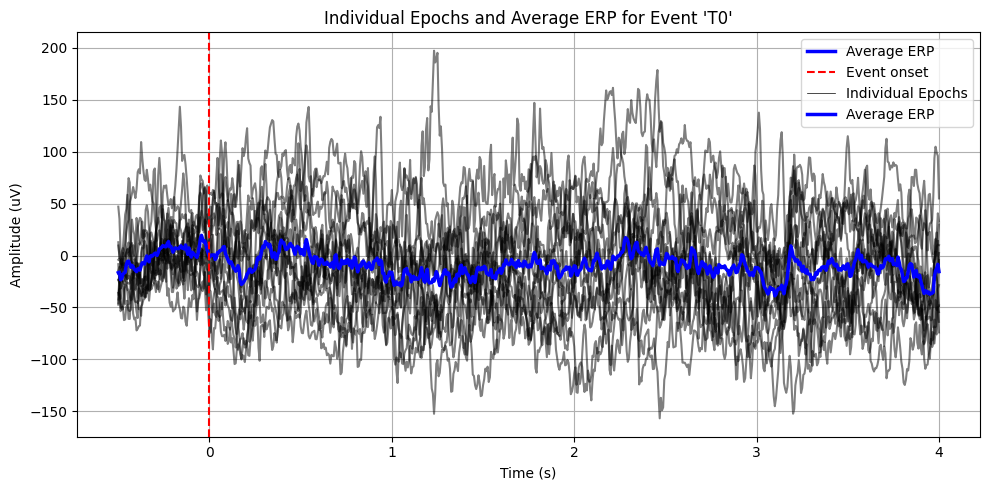

Plot for label 'T0' with individual epochs and average ERP saved as individual_and_average_erp_T0.png
--- DataFrame for Event 'T1' (showing first 5 rows) ---
(7, 46145)


(64, 721)


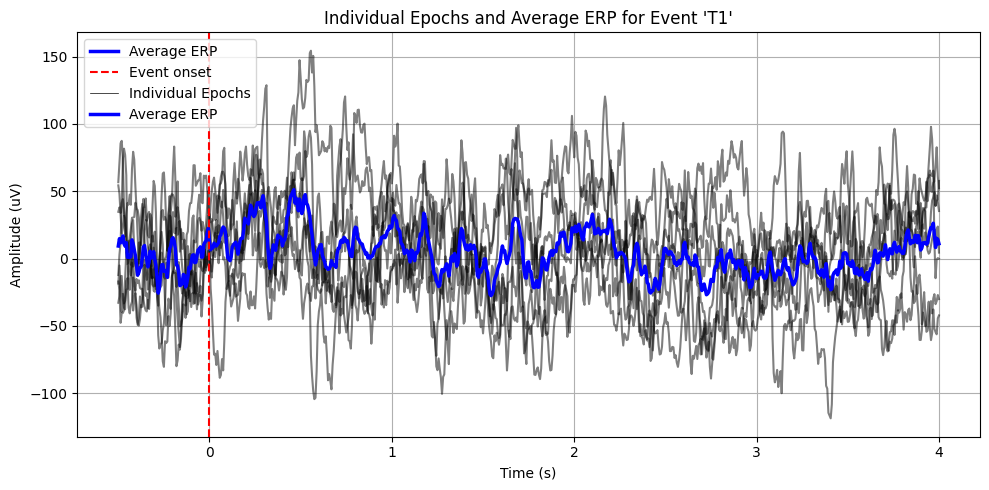

Plot for label 'T1' with individual epochs and average ERP saved as individual_and_average_erp_T1.png
--- DataFrame for Event 'T2' (showing first 5 rows) ---
(8, 46145)


(64, 721)


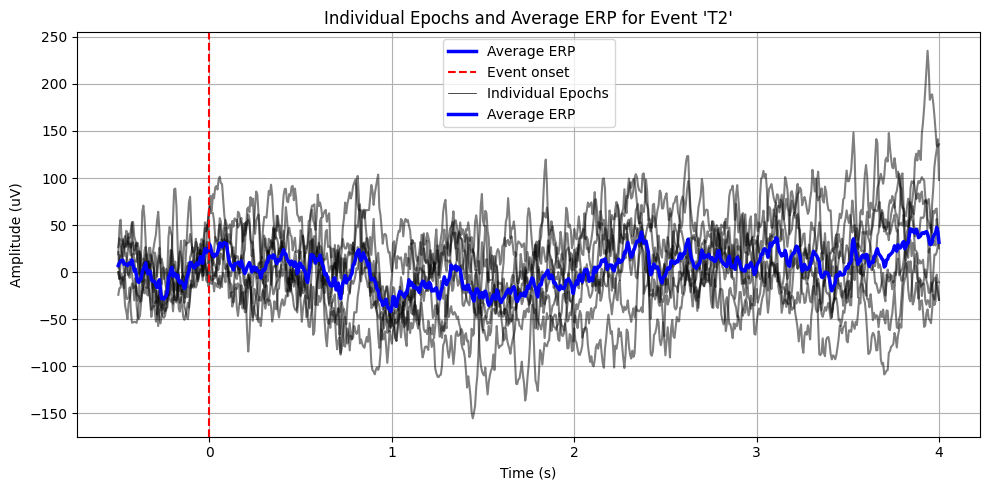

Plot for label 'T2' with individual epochs and average ERP saved as individual_and_average_erp_T2.png
All plots generated successfully.


In [14]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The file path for the EEG data
file_path = "EEG_data/Physionet/S001/S001R14.edf"

# Load the raw EEG data and get events
raw = mne.io.read_raw_edf(file_path, preload=True)
events, event_id = mne.events_from_annotations(raw)
tmin, tmax = -0.5, 4.0

# Create epochs from the raw data based on events
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=(None, 0), preload=True)

# Get the unique labels to create separate plots for each event type
unique_labels = sorted(list(event_id.keys()))

# Loop through each unique label to create a plot
for label in unique_labels:
    # Select epochs for the current label
    epochs_for_label = epochs[label]

    if len(epochs_for_label) > 0:
        # Get the 3D data array (n_epochs, n_channels, n_times)
        data = epochs_for_label.get_data()

        # Get the integer labels for the current epochs
        labels = epochs_for_label.events[:, -1]

        # Reshape the data to a 2D format (n_epochs, n_channels * n_times)
        n_epochs = data.shape[0]
        flattened_data = data.reshape(n_epochs, -1)

        # Create a DataFrame from the flattened data
        df = pd.DataFrame(flattened_data)
        # Check if any epochs exist for the label

        # Add the labels as the last column
        df['label'] = labels

        print(f"--- DataFrame for Event '{label}' (showing first 5 rows) ---")
        print(df.shape)
        print("\n")
        # Get the time points for the x-axis
        times = epochs_for_label.times
        
        # Create a new figure and a single axis for the plot
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Plot each individual epoch's mean (averaged across channels)
        for i in range(data.shape[0]):
            single_epoch_mean = np.mean(data[i, :, :], axis=0)
            ax.plot(times, single_epoch_mean*10**6, color='black', linestyle='-', alpha=0.5)
        
        # Calculate the overall average ERP
        evoked_data = epochs_for_label.average().get_data()
        print(evoked_data.shape)
        # Calculate the mean across channels for the evoked data
        evoked_mean = np.mean(evoked_data, axis=0)

        # Plot the average ERP as a bold line on top of the individual plots
        ax.plot(times, evoked_mean*10**6, color='blue', linewidth=2.5, label='Average ERP')
        
        # Add titles and labels for clarity
        ax.set_title(f"Individual Epochs and Average ERP for Event '{label}'")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Amplitude (uV)")
        ax.axvline(0, color='r', linestyle='--', label='Event onset')
        ax.grid(True)
        
        # Create a legend
        ax.plot([], [], color='black', linewidth=0.5, label='Individual Epochs')
        ax.plot([], [], color='blue', linewidth=2.5, label='Average ERP')
        ax.legend()
        
        # Adjust the layout and save the figure
        plt.tight_layout()
        plt.show()
        
        print(f"Plot for label '{label}' with individual epochs and average ERP saved as individual_and_average_erp_{label}.png")

print("All plots generated successfully.")

Extracting EDF parameters from d:\Data\Sanjeev\IITM\Year5\DDP_EEG_Research\EEG_data\Physionet\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Not setting metadata
30 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 721 original time points ...
1 bad epochs dropped
--- DataFrame for Event 'T0' (showing first 5 rows) ---
(14, 46145)


(64, 721)


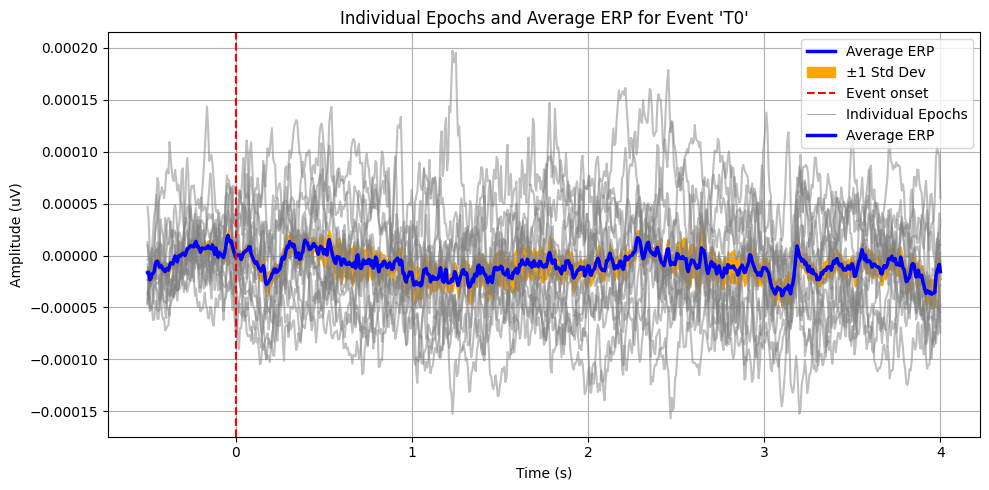

Plot for label 'T0' with individual epochs and average ERP saved as individual_and_average_erp_T0.png
--- DataFrame for Event 'T1' (showing first 5 rows) ---
(7, 46145)


(64, 721)


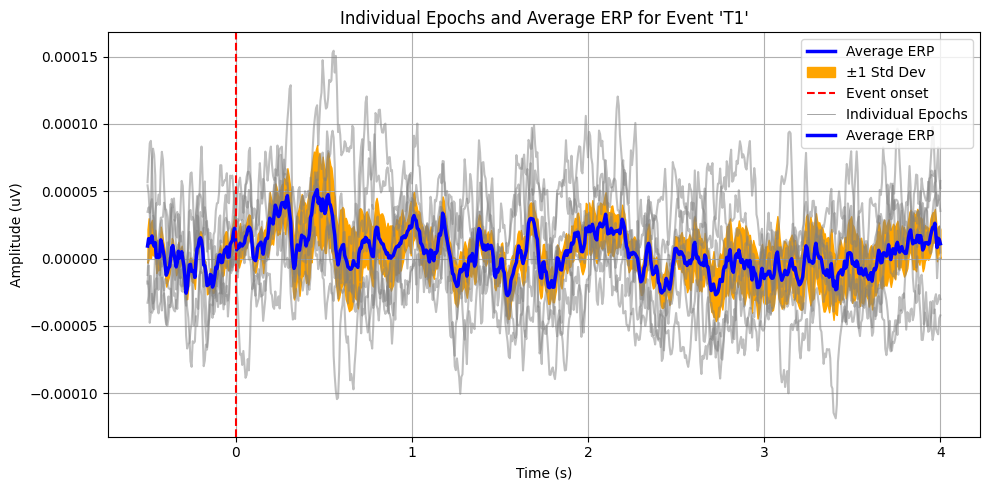

Plot for label 'T1' with individual epochs and average ERP saved as individual_and_average_erp_T1.png
--- DataFrame for Event 'T2' (showing first 5 rows) ---
(8, 46145)


(64, 721)


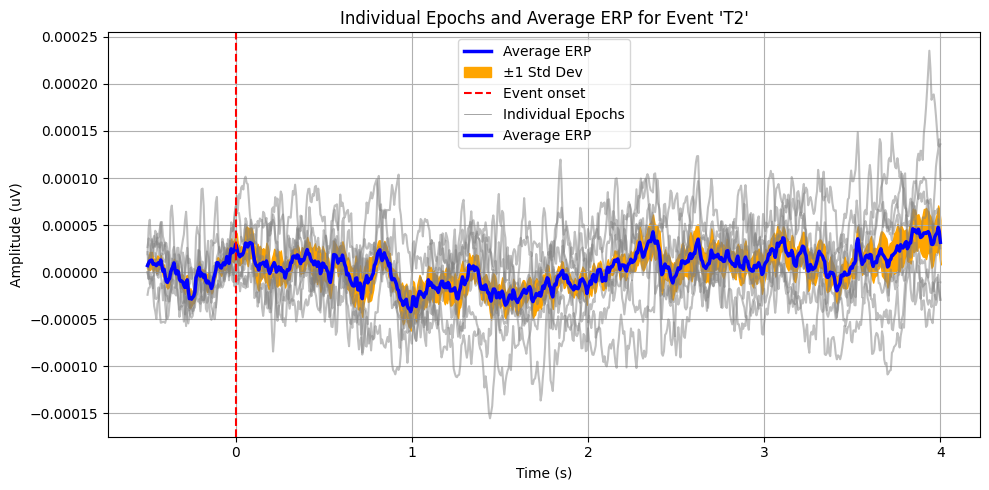

Plot for label 'T2' with individual epochs and average ERP saved as individual_and_average_erp_T2.png
All plots generated successfully.


In [2]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The file path for the EEG data
file_path = "EEG_data/Physionet/S001/S001R14.edf"

# Load the raw EEG data and get events
raw = mne.io.read_raw_edf(file_path, preload=True)
events, event_id = mne.events_from_annotations(raw)
tmin, tmax = -0.5, 4.0

# Create epochs from the raw data based on events
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=(None, 0), preload=True)

# Get the unique labels to create separate plots for each event type
unique_labels = sorted(list(event_id.keys()))

# Loop through each unique label to create a plot
for label in unique_labels:
    # Select epochs for the current label
    epochs_for_label = epochs[label]

    if len(epochs_for_label) > 0:
        # Get the 3D data array (n_epochs, n_channels, n_times)
        data = epochs_for_label.get_data()

        # Get the integer labels for the current epochs
        labels = epochs_for_label.events[:, -1]

        # Reshape the data to a 2D format (n_epochs, n_channels * n_times)
        n_epochs = data.shape[0]
        flattened_data = data.reshape(n_epochs, -1)

        # Create a DataFrame from the flattened data
        df = pd.DataFrame(flattened_data)
        # Check if any epochs exist for the label

        # Add the labels as the last column
        df['label'] = labels

        print(f"--- DataFrame for Event '{label}' (showing first 5 rows) ---")
        print(df.shape)
        print("\n")
        # Get the time points for the x-axis
        times = epochs_for_label.times
        
        # Create a new figure and a single axis for the plot
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Plot each individual epoch's mean (averaged across channels)
        for i in range(data.shape[0]):
            single_epoch_mean = np.mean(data[i, :, :], axis=0)
            ax.plot(times, single_epoch_mean, color='gray', linestyle='-', alpha=0.5)
        
        # Calculate the overall average ERP
        evoked_data = epochs_for_label.average().get_data()
        print(evoked_data.shape)
        # Calculate the mean across channels for the evoked data
        evoked_mean = np.mean(evoked_data, axis=0)
        evoked_std = np.std(evoked_data, axis=0)

        # Plot the average ERP as a bold line on top of the individual plots
        ax.plot(times, evoked_mean, color='blue', linewidth=2.5, label='Average ERP')
        ax.fill_between(times, evoked_mean - evoked_std, evoked_mean + evoked_std, color='orange', alpha=1, label='±1 Std Dev')
        
        # Add titles and labels for clarity
        ax.set_title(f"Individual Epochs and Average ERP for Event '{label}'")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Amplitude (uV)")
        ax.axvline(0, color='r', linestyle='--', label='Event onset')
        ax.grid(True)
        
        # Create a legend
        ax.plot([], [], color='gray', linewidth=0.5, label='Individual Epochs')
        ax.plot([], [], color='blue', linewidth=2.5, label='Average ERP')
        ax.legend()
        
        # Adjust the layout and save the figure
        plt.tight_layout()
        plt.show()
        
        print(f"Plot for label '{label}' with individual epochs and average ERP saved as individual_and_average_erp_{label}.png")

print("All plots generated successfully.")

1271


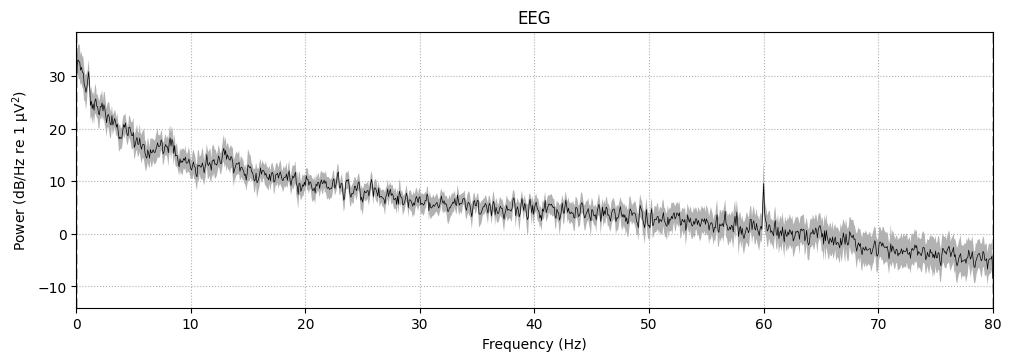

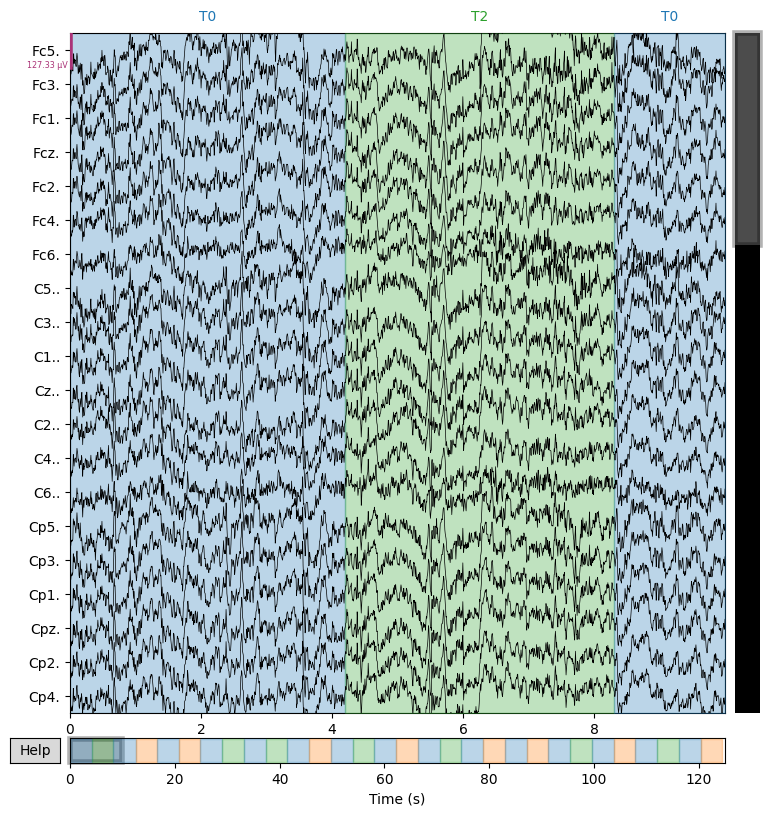

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


c:\Users\Sanjeev M\AppData\Local\Programs\Python\Python313\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


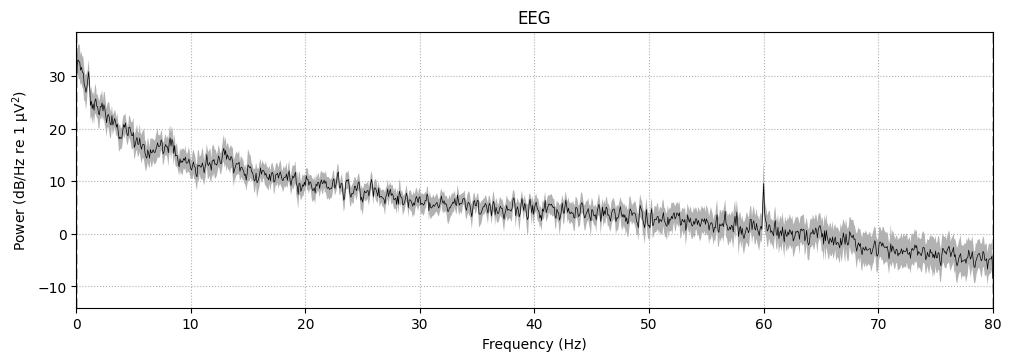

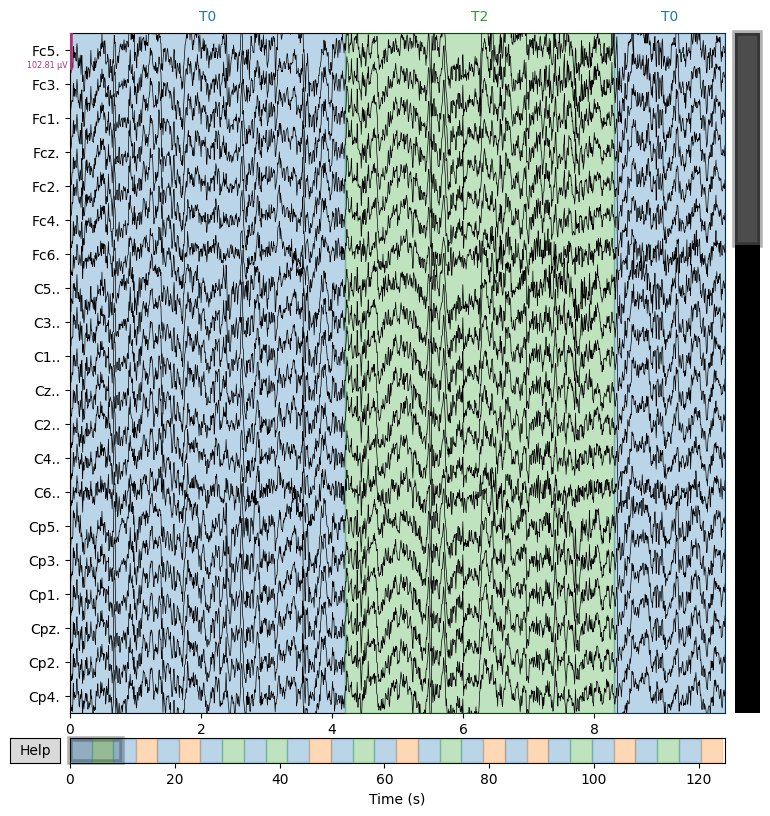

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


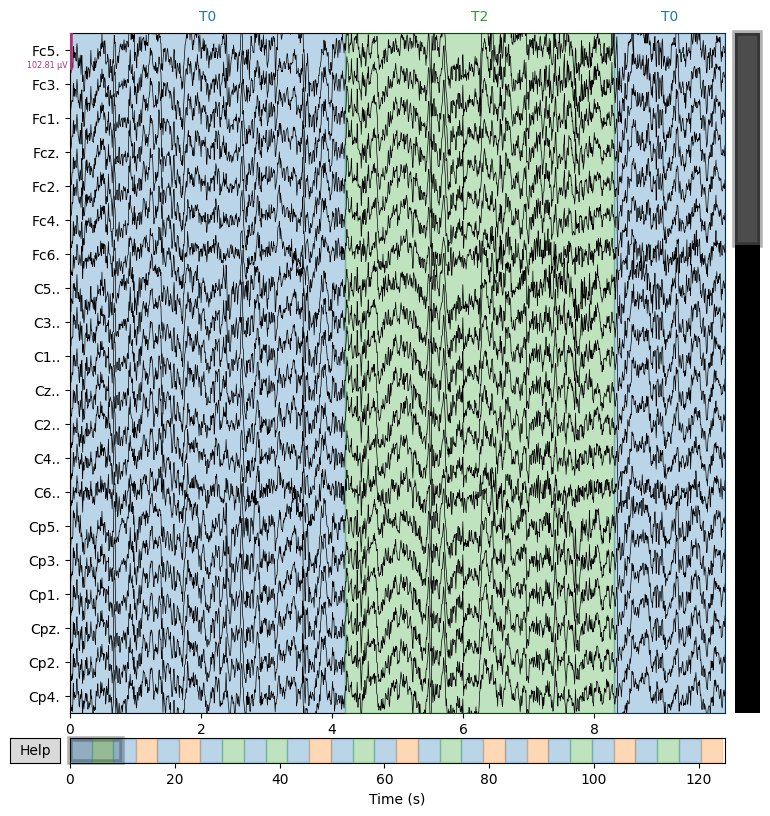

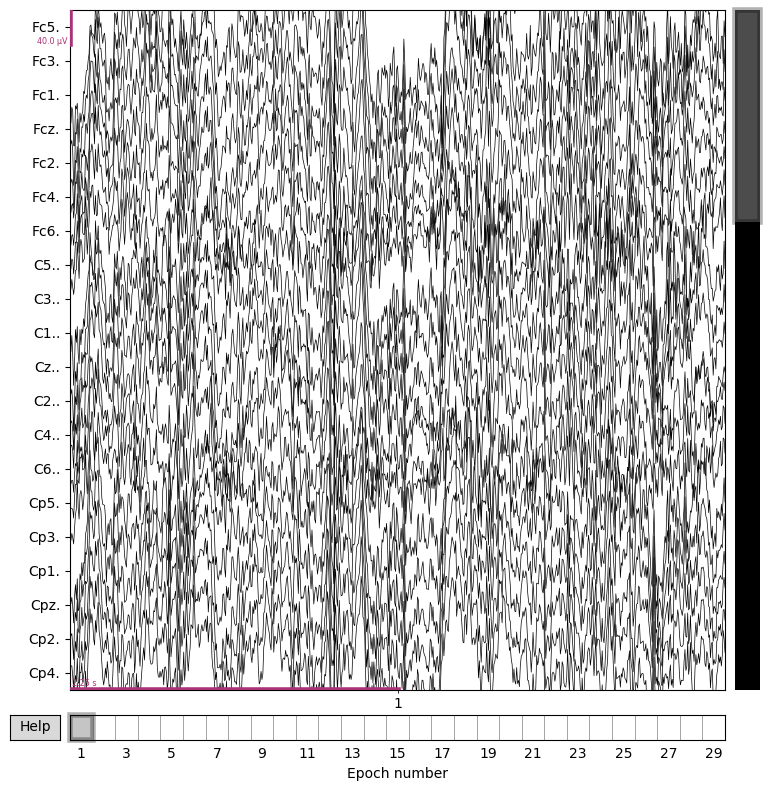

Max amplitude per epoch: [0.0003493  0.00018926 0.00018529 0.00055919 0.00021024 0.00019736
 0.0001697  0.00067872 0.00030072 0.00024028]
Threshold = 200 µV (0.00019999999999999998 V). Bad epochs: [0, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 22, 23, 24, 25, 26, 28]
Dropped 20 epochs: 0, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 22, 23, 24, 25, 26, 28
Epochs before: 29, after rejection: 9


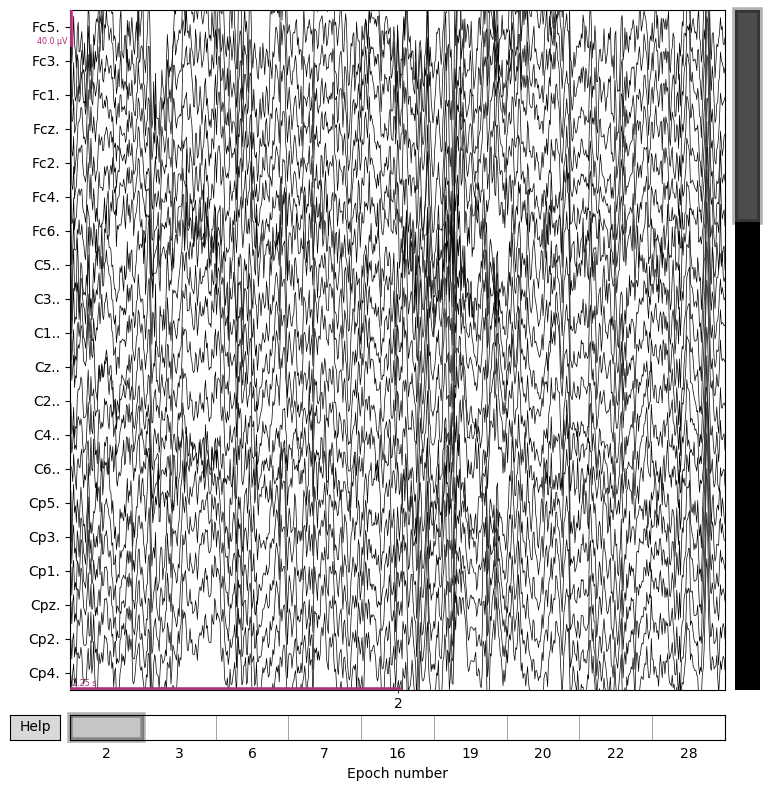

EEG_data/Physionet/S001/S001R04.edf: (9, 64, 721), labels={np.int64(1), np.int64(2), np.int64(3)}
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


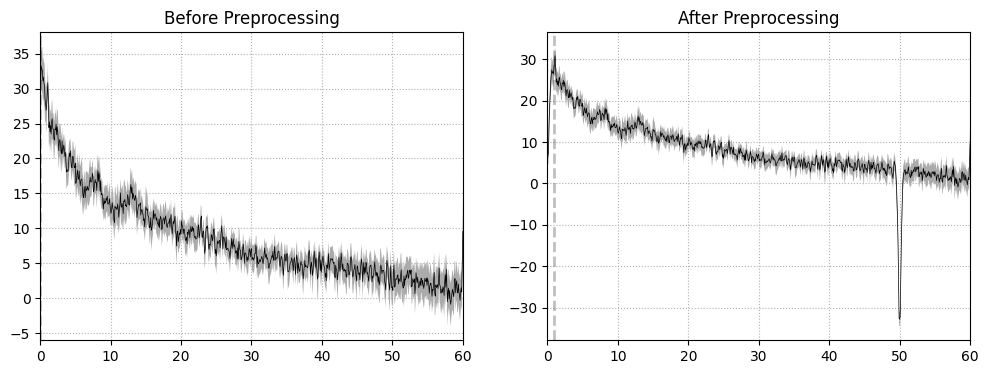

In [ ]:
import matplotlib.pyplot as plt
import mne
from preprocessing.filters import bandpass_filter, notch_filter
from preprocessing.artifacts import run_ica, reject_bad_epochs
from preprocessing.epoching import create_epochs
from preprocessing.normalize import zscore_normalize
    
file_path = "EEG_data/Physionet/S001/S001R04.edf"  # pick one file

# Load raw
raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)

# --- Plot raw before preprocessing ---
raw.plot(title="Raw EEG (unfiltered)", scalings="auto")
raw.compute_psd().plot(average=True)
# Step 1: Filters
raw_filt = bandpass_filter(raw, 1, 79)
raw_filt = notch_filter(raw_filt, 50)

# --- Plot after bandpass+notch ---
raw_filt.plot(title="After Bandpass + Notch", scalings="auto")

# Step 2: ICA artifact removal
raw_clean = run_ica(raw_filt, n_components=20)

# --- Plot after ICA ---
raw_clean.plot(title="After ICA Cleaning", scalings="auto")

# Step 3: Epoching
epochs = create_epochs(raw_clean, tmin=-0.5, tmax=4.0)
epochs.plot(n_epochs=1, title="Epochs before rejecting bad ones")
epochs = reject_bad_epochs(epochs, threshold_uV=200)

# Plot first few epochs
epochs.plot(n_epochs=1, title="Epochs after preprocessing")

# Step 4: Normalization (can’t plot raw values since they’re z-scored)
data = epochs.get_data()
labels = epochs.events[:, -1]
norm_data = zscore_normalize(data)

print(f"{file_path}: {norm_data.shape}, labels={set(labels)}")

# --- Optional: PSD comparison ---
psd_before = raw.compute_psd(fmax=60)
psd_after = raw_clean.compute_psd(fmax=60)

# Plot side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
psd_before.plot(axes=ax[0], average=True, show=False)
ax[0].set_title("Before Preprocessing")

psd_after.plot(axes=ax[1], average=True, show=False)
ax[1].set_title("After Preprocessing")

plt.tight_layout()
plt.show()
